In [1]:
#working directory
import os 
os.chdir("D:/edvisor data science path/Project_2_python")
os.getcwd()

'D:\\edvisor data science path\\Project_2_python'

In [2]:
#import the usefull libraries 
import pandas as pd
import matplotlib as mlt
import numpy as np
from fancyimpute import KNN
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange,uniform
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier 
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import scipy.stats 
from scipy.stats import chi2_contingency
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [3]:
#for visualizations(to use ggplot) import some usefull libraries 
from pandas.api.types import CategoricalDtype
from plotnine import *
%matplotlib inline

In [4]:
training_data=pd.read_csv("train_cab.csv",sep=',')

In [5]:
test_data=pd.read_csv("test.csv",sep=',')

In [5]:
training_data.shape

(16067, 7)

In [7]:
training_data.index

RangeIndex(start=0, stop=16067, step=1)

In [8]:
training_data.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [6]:
training_data.isnull().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [10]:
training_data['fare_amount'].describe()

count     16043
unique      468
top         6.5
freq        759
Name: fare_amount, dtype: object

In [11]:
training_data['pickup_datetime'].describe()

count                       16067
unique                      16021
top       2013-11-03 01:26:00 UTC
freq                            2
Name: pickup_datetime, dtype: object

In [12]:
training_data['pickup_longitude'].describe()
    

count    16067.000000
mean       -72.462787
std         10.578384
min        -74.438233
25%        -73.992156
50%        -73.981698
75%        -73.966838
max         40.766125
Name: pickup_longitude, dtype: float64

In [13]:
training_data['pickup_latitude'].describe()

count    16067.000000
mean        39.914725
std          6.826587
min        -74.006893
25%         40.734927
50%         40.752603
75%         40.767381
max        401.083332
Name: pickup_latitude, dtype: float64

In [14]:
training_data['dropoff_longitude'].describe()

count    16067.000000
mean       -72.462328
std         10.575062
min        -74.429332
25%        -73.991182
50%        -73.980172
75%        -73.963643
max         40.802437
Name: dropoff_longitude, dtype: float64

In [15]:
training_data['dropoff_latitude'].describe()

count    16067.000000
mean        39.897906
std          6.187087
min        -74.006377
25%         40.734651
50%         40.753567
75%         40.768013
max         41.366138
Name: dropoff_latitude, dtype: float64

In [16]:
training_data['passenger_count'].describe()

count    16012.000000
mean         2.625070
std         60.844122
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [6]:
#exploratory data analysis
#changing the variable datatypes into desired datatypes we need the target variable into numeric formater and the datetime varable into datetime formate and we need to ananlyze the lattitude and longitude variable as well 

training_data['fare_amount'] = pd.to_numeric(training_data['fare_amount'], errors='coerce')

In [7]:
training_data['fare_amount'].describe()

count    16042.000000
mean        15.015004
std        430.460945
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [7]:
import datetime 

In [8]:
training_data['pickup_datetime'] = pd.to_datetime(training_data['pickup_datetime'],errors='coerce')

In [9]:
training_data['pickup_datetime']=pd.to_numeric(training_data['pickup_datetime'],errors='coerce')

In [10]:
training_data['pickup_datetime'].describe()

count    1.606700e+04
mean     1.331348e+18
std      1.017352e+17
min     -9.223372e+18
25%      1.281239e+18
50%      1.331826e+18
75%      1.381372e+18
max      1.435704e+18
Name: pickup_datetime, dtype: float64

In [11]:
training_data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,1245086781000000000,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,1262710336000000000,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,1313627700000000000,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,1334982642000000000,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,1268121060000000000,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,1294307445000000000,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,1353443700000000000,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,1325697720000000000,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,1354540200000000000,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.9,1251853860000000000,-73.980658,40.733873,-73.991540,40.758138,2.0


In [36]:
training_data['pickup_datetime'].describe()

count     16067.000000
mean     734533.419556
std        5834.572102
min           1.000000
25%      733992.000000
50%      734577.000000
75%      735150.500000
max      735779.000000
Name: pickup_datetime, dtype: float64

In [14]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16042 non-null float64
pickup_datetime      16067 non-null int64
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(6), int64(1)
memory usage: 878.7 KB


In [13]:
#Missing value analysis
#create dataframe with missing percentage

missing_val=pd.DataFrame(training_data.isnull().sum())

In [17]:
#restting the index
missing_val=missing_val.reset_index()

In [19]:
#rename the variables 
missing_val=missing_val.rename(columns={'index':'variables',0:'missing_percentage'})

In [20]:
missing_val

,variables,missing_percentage
0,fare_amount,25
1,pickup_datetime,0
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55


In [21]:
#calculate percentage
missing_val['missing_percentage']=(missing_val['missing_percentage']/len(training_data))*100

In [22]:
missing_val

,variables,missing_percentage
0,fare_amount,0.155598
1,pickup_datetime,0.000000
2,pickup_longitude,0.000000
3,pickup_latitude,0.000000
4,dropoff_longitude,0.000000
5,dropoff_latitude,0.000000
6,passenger_count,0.342317


In [23]:
#sort in descending order
missing_val=missing_val.sort_values('missing_percentage',ascending=False).reset_index(drop=True)

In [24]:
missing_val

,variables,missing_percentage
0,passenger_count,0.342317
1,fare_amount,0.155598
2,pickup_datetime,0.000000
3,pickup_longitude,0.000000
4,pickup_latitude,0.000000
5,dropoff_longitude,0.000000
6,dropoff_latitude,0.000000


In [35]:
#lets check what is the best method to impute missing  values
#save output result first
missing_val.to_csv("Missing_perc.csv",index=False)


In [54]:
#columns which have missing values 
#passenger_count
#fare_amount

In [48]:
training_data[:30]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,733573,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,733777,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,734367,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,734614,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,733840,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,734143,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,734827,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,734506,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,734840,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.9,733652,-73.980658,40.733873,-73.991540,40.758138,2.0


In [25]:
#create some missing values to impute
#orignal value obserbation index 17,,,passenger_count value is 1
training_data['passenger_count'].loc[17]=np.nan


C:\Users\usman hussain\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [51]:
training_data[:30]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,733573,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,733777,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,734367,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,734614,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,733840,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,734143,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,734827,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,734506,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,734840,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.9,733652,-73.980658,40.733873,-73.991540,40.758138,2.0


In [52]:
#impute with mean
training_data['passenger_count']=training_data['passenger_count'].fillna(training_data['passenger_count'].mean())

In [53]:
training_data[:30]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,733573,-73.844311,40.721319,-73.841610,40.712278,1.000000
1,16.9,733777,-74.016048,40.711303,-73.979268,40.782004,1.000000
2,5.7,734367,-73.982738,40.761270,-73.991242,40.750562,2.000000
3,7.7,734614,-73.987130,40.733143,-73.991567,40.758092,1.000000
4,5.3,733840,-73.968095,40.768008,-73.956655,40.783762,1.000000
5,12.1,734143,-74.000964,40.731630,-73.972892,40.758233,1.000000
6,7.5,734827,-73.980002,40.751662,-73.973802,40.764842,1.000000
7,16.5,734506,-73.951300,40.774138,-73.990095,40.751048,1.000000
8,NaN,734840,-74.006462,40.726713,-73.993078,40.731628,1.000000
9,8.9,733652,-73.980658,40.733873,-73.991540,40.758138,2.000000


In [84]:
#mean method 2.62

In [57]:
training_data['passenger_count'].loc[17]=np.nan

In [12]:
#impute with median
training_data['passenger_count']=training_data['passenger_count'].fillna(training_data['passenger_count'].median())

In [28]:
training_data.isnull().sum()

fare_amount          25
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
dtype: int64

In [27]:
training_data[:30]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,1245086781000000000,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,1262710336000000000,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,1313627700000000000,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,1334982642000000000,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,1268121060000000000,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,1294307445000000000,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,1353443700000000000,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,1325697720000000000,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,1354540200000000000,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.9,1251853860000000000,-73.980658,40.733873,-73.991540,40.758138,2.0


In [ ]:
# median method 1.0

In [38]:
#median method is performing perfectly in this case
training_data['passenger_count']=training_data['passenger_count'].fillna(training_data['passenger_count'].median())

In [29]:
#lets check for another variable fare_amount
training_data[:50]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.50,1245086781000000000,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.90,1262710336000000000,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.70,1313627700000000000,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.70,1334982642000000000,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.30,1268121060000000000,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.10,1294307445000000000,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.50,1353443700000000000,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.50,1325697720000000000,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,1354540200000000000,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.90,1251853860000000000,-73.980658,40.733873,-73.991540,40.758138,2.0


In [30]:
#create some missing value orignal value is 4.50
training_data['fare_amount'].loc[36]=np.nan

In [31]:
training_data[:50]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.50,1245086781000000000,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.90,1262710336000000000,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.70,1313627700000000000,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.70,1334982642000000000,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.30,1268121060000000000,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.10,1294307445000000000,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.50,1353443700000000000,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.50,1325697720000000000,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,1354540200000000000,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.90,1251853860000000000,-73.980658,40.733873,-73.991540,40.758138,2.0


In [8]:
#impute with mean 
training_data['fare_amount']=training_data['fare_amount'].fillna(training_data['fare_amount'].mean())

In [ ]:
#imputed value with mean is 15.01

In [25]:
training_data['fare_amount'].loc[36]=np.nan

In [13]:
training_data['fare_amount']=training_data['fare_amount'].fillna(training_data['fare_amount'].median())

In [33]:
training_data[:50]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.50,1245086781000000000,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.90,1262710336000000000,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.70,1313627700000000000,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.70,1334982642000000000,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.30,1268121060000000000,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.10,1294307445000000000,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.50,1353443700000000000,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.50,1325697720000000000,-73.951300,40.774138,-73.990095,40.751048,1.0
8,8.50,1354540200000000000,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.90,1251853860000000000,-73.980658,40.733873,-73.991540,40.758138,2.0


In [28]:
#median is closest to the orignal so we will impute it with median

In [37]:
training_data['fare_amount']=training_data['fare_amount'].fillna(training_data['fare_amount'].median())

In [34]:
training_data[:50]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.50,1245086781000000000,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.90,1262710336000000000,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.70,1313627700000000000,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.70,1334982642000000000,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.30,1268121060000000000,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.10,1294307445000000000,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.50,1353443700000000000,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.50,1325697720000000000,-73.951300,40.774138,-73.990095,40.751048,1.0
8,8.50,1354540200000000000,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.90,1251853860000000000,-73.980658,40.733873,-73.991540,40.758138,2.0


In [14]:
training_data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0xaa0aa20>,
 'caps': [<matplotlib.lines.Line2D at 0xaa0ae10>,
 'boxes': [<matplotlib.lines.Line2D at 0xaa0a5f8>],
 'medians': [<matplotlib.lines.Line2D at 0xaa23780>],
 'fliers': [<matplotlib.lines.Line2D at 0xaa23ac8>],
 'means': []}

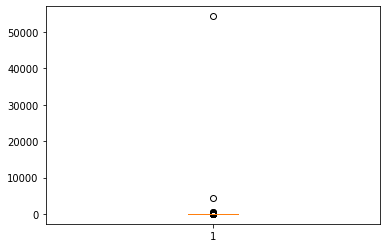

In [16]:
#lets start outlier analysis
#plot boxplot to visualization for outliers
%matplotlib inline
plt.boxplot(training_data['fare_amount'])


{'whiskers': [<matplotlib.lines.Line2D at 0xaab6b00>,
 'caps': [<matplotlib.lines.Line2D at 0xaab6fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0xaab66d8>],
 'medians': [<matplotlib.lines.Line2D at 0xaac28d0>],
 'fliers': [<matplotlib.lines.Line2D at 0xaac2c18>],
 'means': []}

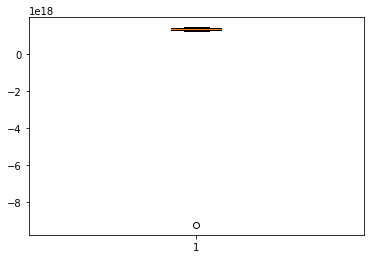

In [17]:
%matplotlib inline
plt.boxplot(training_data['pickup_datetime'])

{'whiskers': [<matplotlib.lines.Line2D at 0xab18f60>,
 'caps': [<matplotlib.lines.Line2D at 0xab26978>,
 'boxes': [<matplotlib.lines.Line2D at 0xab18e10>],
 'medians': [<matplotlib.lines.Line2D at 0xab26da0>],
 'fliers': [<matplotlib.lines.Line2D at 0xab30390>],
 'means': []}

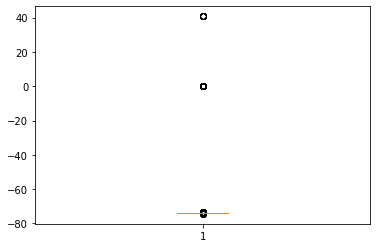

In [18]:
%matplotlib inline
plt.boxplot(training_data['pickup_longitude'])

{'whiskers': [<matplotlib.lines.Line2D at 0xab8d630>,
 'caps': [<matplotlib.lines.Line2D at 0xab8dcf8>,
 'boxes': [<matplotlib.lines.Line2D at 0xab8d128>],
 'medians': [<matplotlib.lines.Line2D at 0xab973c8>],
 'fliers': [<matplotlib.lines.Line2D at 0xab97710>],
 'means': []}

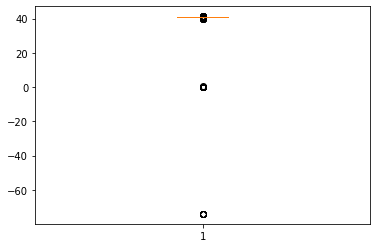

In [19]:
%matplotlib inline
plt.boxplot(training_data['dropoff_latitude'])

{'whiskers': [<matplotlib.lines.Line2D at 0x11481898>,
 'caps': [<matplotlib.lines.Line2D at 0x11481f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x11481470>],
 'medians': [<matplotlib.lines.Line2D at 0x1148c630>],
 'fliers': [<matplotlib.lines.Line2D at 0x1148c978>],
 'means': []}

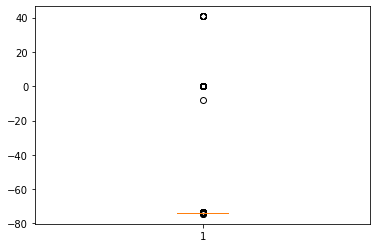

In [70]:
%matplotlib inline
plt.boxplot(training_data['dropoff_longitude'])

In [15]:

cnames=["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","passenger_count","pickup_datetime","fare_amount"]

In [16]:
 for i in cnames:
     print(i)
     q75, q25 = np.percentile(training_data.loc[:,i], [75 ,25])
     iqr = q75 - q25

     minimum = q25 - (iqr*1.5)
     maximum = q75 + (iqr*1.5)
     print(minimum)
     print(maximum)
    
     training_data= training_data.drop(training_data[training_data.loc[:,i] < minimum].index)
     training_data = training_data.drop(training_data[training_data.loc[:,i] > maximum].index)

pickup_longitude
-74.03013225
-73.92886225
pickup_latitude
40.6927295
40.8111095
dropoff_longitude
-74.02883324999999
-73.92950525000003
dropoff_latitude
40.69237812500002
40.81292112499999
passenger_count
-0.5
3.5
pickup_datetime
1.1291353311250002e+18
1.5325486881249997e+18
fare_amount
-2.1000000000000005
18.700000000000003


In [17]:
 for i in cnames:
     print(i)
     training_data= training_data.drop(training_data[training_data.loc[:,i] == 0].index)


pickup_longitude
pickup_latitude
dropoff_longitude
dropoff_latitude
passenger_count
pickup_datetime
fare_amount


In [19]:
training_data.describe()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,11644.000000,1.164400e+04,11644.000000,11644.000000,11644.000000,11644.000000,11644.000000
mean,8.323908,1.330543e+18,-73.981762,40.753004,-73.980842,40.753466,1.253961
std,3.442181,5.853282e+16,0.015986,0.020983,0.016558,0.021877,0.532527
min,0.010000,1.230774e+18,-74.018108,40.692830,-74.019535,40.692483,0.120000
25%,5.700000,1.279247e+18,-73.992730,40.738673,-73.991920,40.739155,1.000000
50%,7.700000,1.330070e+18,-73.982705,40.753499,-73.982012,40.754677,1.000000
75%,10.500000,1.379945e+18,-73.971525,40.766749,-73.970770,40.767384,1.000000
max,18.500000,1.435704e+18,-73.929557,40.811077,-73.929520,40.812595,3.000000


In [24]:
ds=training_data.corr()
ds

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.147894,-0.058172,-0.063751,-0.007843,-0.056374,0.022695
pickup_datetime,0.147894,1.000000,-0.003757,-0.001594,0.012728,0.013032,-0.015921
pickup_longitude,-0.058172,-0.003757,1.000000,0.680100,0.446275,0.374281,-0.040489
pickup_latitude,-0.063751,-0.001594,0.680100,1.000000,0.356443,0.546779,-0.019090
dropoff_longitude,-0.007843,0.012728,0.446275,0.356443,1.000000,0.644040,-0.027339
dropoff_latitude,-0.056374,0.013032,0.374281,0.546779,0.644040,1.000000,-0.006018
passenger_count,0.022695,-0.015921,-0.040489,-0.019090,-0.027339,-0.006018,1.000000


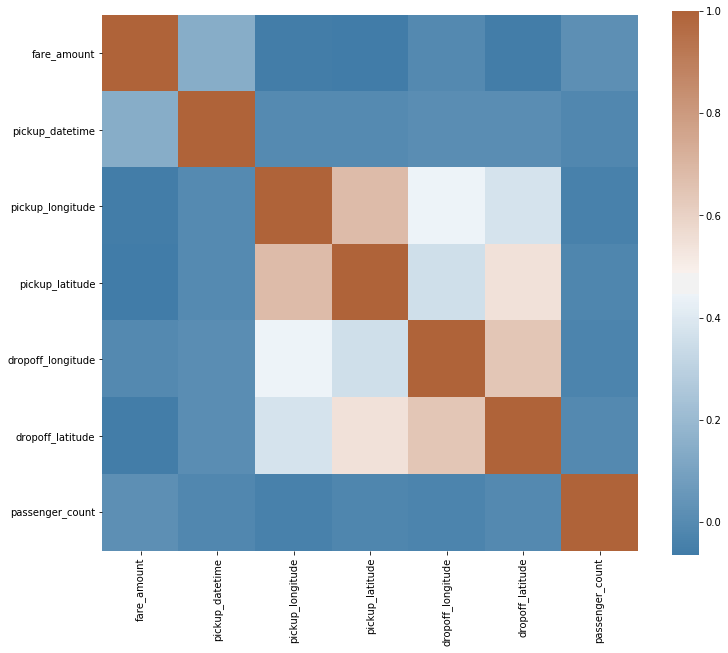

In [25]:
f,ag=plt.subplots(figsize=(12,10))
sns.heatmap(ds,mask=np.zeros_like(ds,dtype=np.bool),cmap=sns.diverging_palette(240,30,as_cmap=True),square=True,ax=ag)

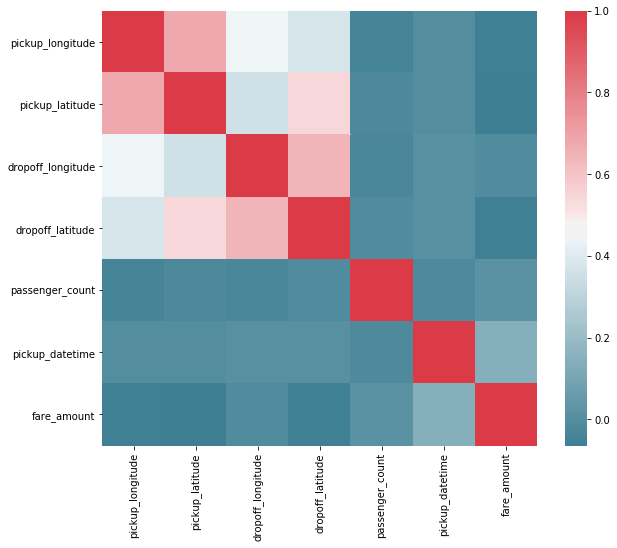

In [26]:
#feature selection 
#corelation analysis
df_corr=training_data.loc[:,cnames]
#set the width and hight of the plot
f,ax=plt.subplots(figsize=(10,8))
#generate corelation matrix
corr=df_corr.corr()
#plot using seaborn library 
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)

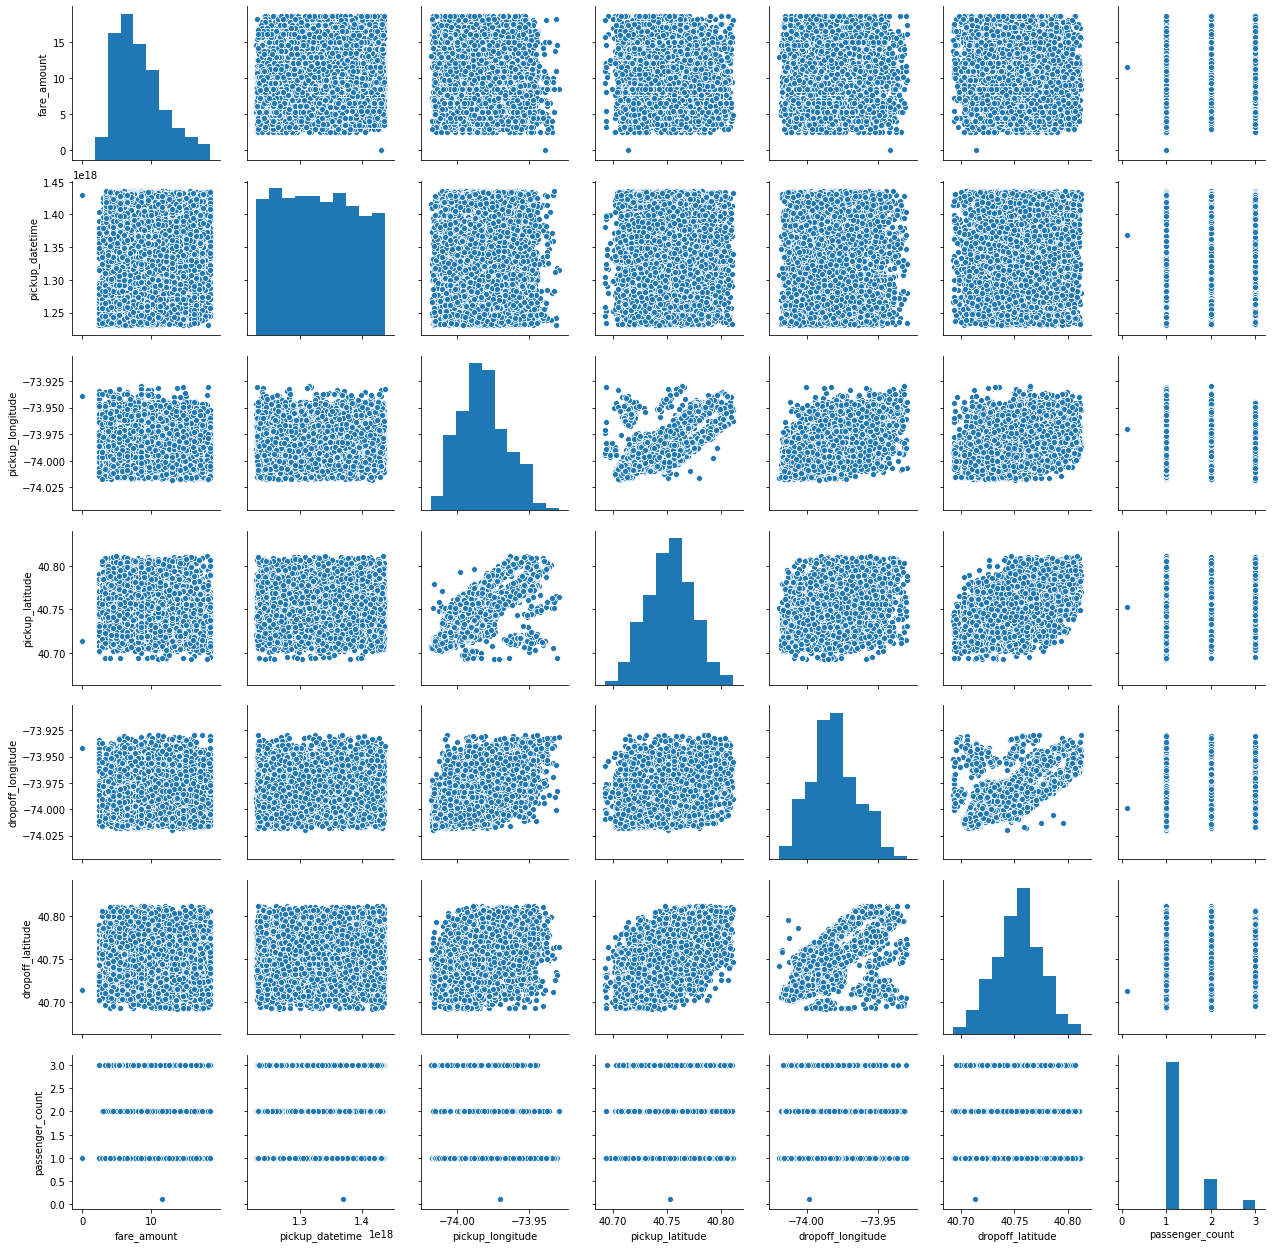

In [29]:
%matplotlib inline
sns.pairplot(training_data)

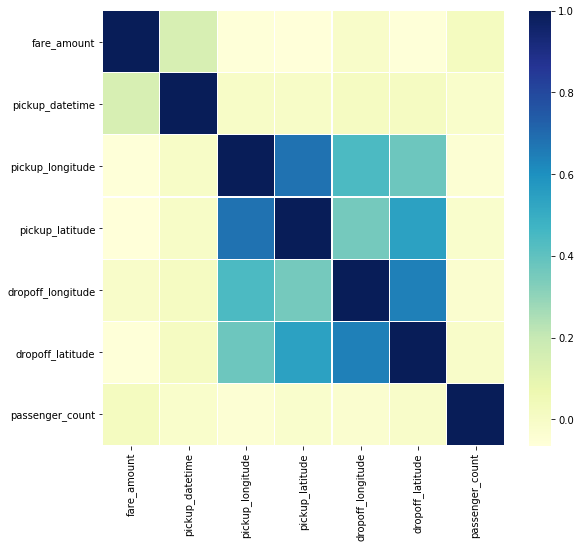

In [30]:
corrmat = training_data.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

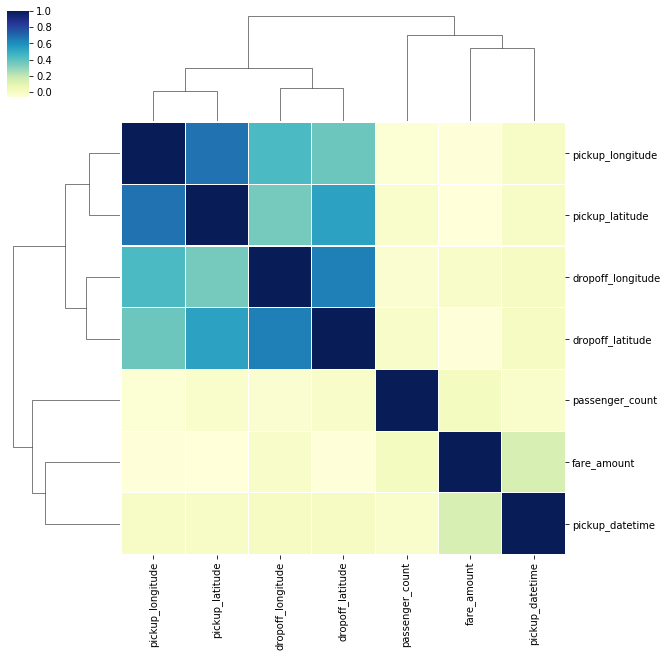

In [31]:
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg 

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 9.232e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.864e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 5.470e+02]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <a list of 15 Patch objects>)

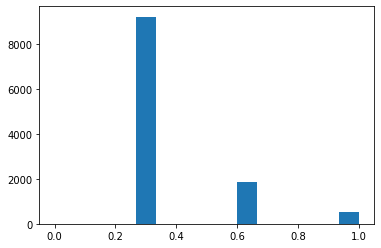

In [44]:
#Normality check
%matplotlib inline
plt.hist(training_data['passenger_count'],bins='auto')

(array([  1.,   0.,   0.,   0.,   0.,  41.,  36., 124., 239., 418., 572.,
        657., 424., 691., 712., 649., 653., 572., 307., 565., 548., 485.,
        445., 375., 525., 138., 325., 259., 255., 204., 194.,  82., 159.,
        132., 121., 106.,  98.,  34., 101., 102.,  78.,  77.,  46.,  94.]),
 array([0.        , 0.02272727, 0.04545455, 0.06818182, 0.09090909,
        0.11363636, 0.13636364, 0.15909091, 0.18181818, 0.20454545,
        0.22727273, 0.25      , 0.27272727, 0.29545455, 0.31818182,
        0.34090909, 0.36363636, 0.38636364, 0.40909091, 0.43181818,
        0.45454545, 0.47727273, 0.5       , 0.52272727, 0.54545455,
        0.56818182, 0.59090909, 0.61363636, 0.63636364, 0.65909091,
        0.68181818, 0.70454545, 0.72727273, 0.75      , 0.77272727,
        0.79545455, 0.81818182, 0.84090909, 0.86363636, 0.88636364,
        0.90909091, 0.93181818, 0.95454545, 0.97727273, 1.        ]),
 <a list of 44 Patch objects>)

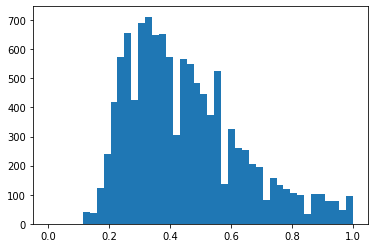

In [59]:
%matplotlib inline
plt.hist(training_data['fare_amount'],bins='auto')

(array([525., 487., 475., 550., 538., 485., 470., 495., 525., 465., 500.,
        533., 516., 460., 484., 542., 463., 488., 464., 442., 411., 445.,
        436., 445.]),
 array([-1.704499  , -1.55861883, -1.41273866, -1.26685849, -1.12097832,
        -0.97509816, -0.82921799, -0.68333782, -0.53745765, -0.39157748,
        -0.24569732, -0.09981715,  0.04606302,  0.19194319,  0.33782336,
         0.48370352,  0.62958369,  0.77546386,  0.92134403,  1.0672242 ,
         1.21310437,  1.35898453,  1.5048647 ,  1.65074487,  1.79662504]),
 <a list of 24 Patch objects>)

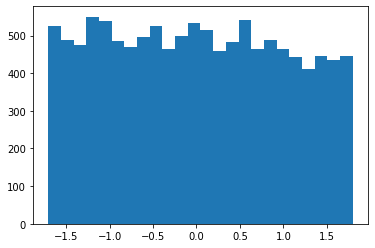

In [45]:
%matplotlib inline
plt.hist(training_data['pickup_datetime'],bins='auto')

In [18]:
cnames1=["passenger_count","fare_amount"]

In [19]:
#Normalization 
for i in cnames1:
    print(i)
    training_data[i]=(training_data[i]-min(training_data[i]))/(max(training_data[i])-min(training_data[i]))


passenger_count
fare_amount


In [20]:
#pickup_datetime needs standerization 
bc=["pickup_datetime"]
for i in bc:
    print(i)
    training_data[i]=(training_data[i]-training_data[i].mean())/training_data[i].std()

pickup_datetime


In [48]:
#chek for Vif score for multicoliniarity 
def vif_cal(input_data,dependent_col):
    import statsmodels.formula.api as smf
    x_vars=input_data.drop([dependent_col],axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula="y~x",data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print(xvar_names[i],"VIF=",vif)

In [49]:
vif_cal(input_data=training_data,dependent_col="fare_amount")

pickup_datetime VIF= 1.0
pickup_longitude VIF= 2.14
pickup_latitude VIF= 2.4
dropoff_longitude VIF= 1.97
dropoff_latitude VIF= 2.23
passenger_count VIF= 1.0


In [18]:
#apply machine learning techniques 
#devide the data into train and test 

In [21]:
train, test = train_test_split(training_data, test_size=0.2)

In [22]:
#############Linear Regression #################**************
model=sm.OLS(train.iloc[:,0],train.iloc[:,1:7]).fit()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.857
Model:                            OLS   Adj. R-squared (uncentered):              0.857
Method:                 Least Squares   F-statistic:                              9305.
Date:                Sun, 08 Sep 2019   Prob (F-statistic):                        0.00
Time:                        10:34:43   Log-Likelihood:                          2533.5
No. Observations:                9315   AIC:                                     -5055.
Df Residuals:                    9309   BIC:                                     -5012.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
pickup_datetime       0.0276      0.002     14.427      0.000       0.024       0.031
pickup_longitude     -0.8019      0.139     -5.757      0.000      -1.075      -0.529
pickup_latitude       0.0249      0.124      0.201      0.841      -0.218       0.268
dropoff_longitude     0.5600      0.140      4.003      0.000       0.286       0.834
dropoff_latitude     -0.4532      0.121     -3.743      0.000      -0.691      -0.216
passenger_count       0.0291      0.010      2.805      0.005       0.009       0.049
==============================================================================
Omnibus:                      822.936   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1058.263
Skew:                           0.821   Prob(JB):                    1.59e-230
Kurtosis:                       3.167   Cond. No.                     1.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
pre=model.predict(test.iloc[:,1:7])

In [25]:
#calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape


In [26]:
MAPE(test.iloc[:,0],pre)

38.10026780222834

In [ ]:
################Decision Tree Regressor****************

In [27]:
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,1:7], train.iloc[:,0])

In [28]:
predictions_DT = fit_DT.predict(test.iloc[:,1:7])

In [29]:
MAPE(test.iloc[:,0], predictions_DT)

37.526438439960586

In [ ]:
###########KNN for Regression **************

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [41]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(training_data, test_size = 0.3)

x_train = train.iloc[:,1:7]
y_train = train.iloc[:,0]

x_test = test.iloc[:,1:7]
y_test = test.iloc[:,0]

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [43]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt


In [44]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model_knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    model_knn.fit(x_train, y_train)  #fit the model
    pred=model_knn.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.15435612359306614
RMSE value for k=  2 is: 0.13344650101733133
RMSE value for k=  3 is: 0.1263784972120699
RMSE value for k=  4 is: 0.12318419055189879
RMSE value for k=  5 is: 0.12182012688855101
RMSE value for k=  6 is: 0.12038432172822978
RMSE value for k=  7 is: 0.12029266517404492
RMSE value for k=  8 is: 0.12062566240113551
RMSE value for k=  9 is: 0.12023233906779243
RMSE value for k=  10 is: 0.12025867590051281
RMSE value for k=  11 is: 0.12041630364333056
RMSE value for k=  12 is: 0.12042387167571138
RMSE value for k=  13 is: 0.12046200448323015
RMSE value for k=  14 is: 0.12047171249769724
RMSE value for k=  15 is: 0.1207917927231022
RMSE value for k=  16 is: 0.12095522161745333
RMSE value for k=  17 is: 0.12100684810000167
RMSE value for k=  18 is: 0.1213460711762061
RMSE value for k=  19 is: 0.12152320692130714
RMSE value for k=  20 is: 0.1217649407459088


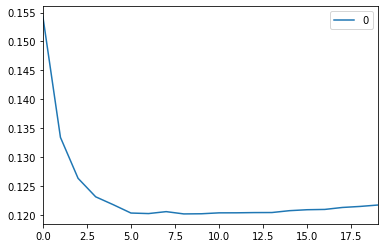

In [45]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
%matplotlib inline
curve.plot()

In [46]:
model_knn = neighbors.KNeighborsRegressor(n_neighbors = 6)
model_knn.fit(x_train, y_train)  #fit the model
pred=model_knn.predict(x_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
print('RMSE value for k= ' , "6" , 'is:', error)

RMSE value for k=  6 is: 0.12038432172822978


In [47]:
pr1=model_knn.predict(test.iloc[:,1:7])

In [48]:
MAPE(test.iloc[:,0],pr1)

34.90351572873286

In [ ]:
#######********Random Forest Regression*************************

In [59]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(n_estimators = 20).fit(x_train, y_train)

In [61]:
RF_Predictions = RF_model.predict(x_test)

In [62]:
RF_Predictions

array([0.42671714, 0.62682531, 0.35776095, ..., 0.36722553, 0.65927528,
       0.50378583])

In [ ]:
##callculate MAPE***********

In [63]:
MAPE(test.iloc[:,0],RF_Predictions)

20.32490707051917

In [7]:
test_data.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [8]:
test_data.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [49]:
test_data['pickup_datetime'] = pd.to_datetime(test_data['pickup_datetime'],errors='coerce')

In [50]:
test_data['pickup_datetime']=pd.to_numeric(test_data['pickup_datetime'],errors='coerce')

In [44]:
test_data['pickup_datetime'].describe()

count    9.914000e+03
mean     1.336296e+18
std      5.586405e+16
min      1.230808e+18
25%      1.290021e+18
50%      1.327563e+18
75%      1.389462e+18
max      1.435695e+18
Name: pickup_datetime, dtype: float64

In [51]:
t_cnames=["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","passenger_count","pickup_datetime"]

In [52]:
#removing outliers from the test data
for i in t_cnames:
     print(i)
     q75, q25 = np.percentile(test_data.loc[:,i], [75 ,25])
     iqr = q75 - q25

     minimum = q25 - (iqr*1.5)
     maximum = q75 + (iqr*1.5)
     print(minimum)
     print(maximum)
    
     test_data= test_data.drop(test_data[test_data.loc[:,i] < minimum].index)
     test_data = test_data.drop(test_data[test_data.loc[:,i] > maximum].index)

pickup_longitude
-74.02923200000001
-73.93128199999998
pickup_latitude
40.692290875
40.810581875
dropoff_longitude
-74.0300015
-73.92718149999999
dropoff_latitude
40.68866700000001
40.81635499999999
passenger_count
-0.5
3.5
pickup_datetime
1.14362188225e+18
1.53517474025e+18


In [53]:
#standerization for datetime
kk=["pickup_datetime"]
for i in kk:
    print(i)
    test_data[i]=(test_data[i]-test_data[i].mean())/test_data[i].std()


pickup_datetime


In [ ]:
###make predictions on test data*************

In [64]:
fare_predictions=RF_model.predict(test_data)

In [65]:
fare_predictions

array([0.61060032, 0.61060032, 0.42888048, ..., 0.61060032, 0.42888048,
       0.61060032])

In [66]:
fare_predictions=pd.DataFrame(fare_predictions)

In [68]:
fare_predictions=fare_predictions.rename(columns={'index':'index',0:'fare_amount'})

In [ ]:
###save the output file

In [69]:
fare_predictions.to_csv("fare_pedictions.csv",index=False)


In [71]:
fare_predictions=pd.read_csv("fare_pedictions.csv",sep=',')

In [76]:
fare_predictions

,fare_amount
0,0.610600
1,0.610600
2,0.428880
3,0.439697
4,0.439697
5,0.439697
6,0.428880
7,0.428880
8,0.610600
9,0.610600
